# Energy overhead study
In this notebook, we study the additional energy cost of each solution. We proceed by comparing the energy consumed by executions with and without tools.

## Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

from visualize import *
import seaborn as sns
import matplotlib.pyplot as plt

## Load experiment results

In [2]:
experiments_path = [
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-17_43_02',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-18_13_34',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-18_44_13',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-19_14_33',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-19_45_01',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-20_15_24',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-20_46_11',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-21_17_22',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-21_48_15',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-09-28-22_18_42'
]

experiments_no_solution_path = [
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-22_28_49',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-22_38_27',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-22_47_56',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-22_57_28',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-23_07_17',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-23_16_57',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-23_26_44',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-23_36_31',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-23_46_05',
    'no-solution-gemini-1.lyon.grid5000.fr-2022-09-28-23_55_46'
]

experiments = []
for experiment_path in experiments_path:
    experiments.append(parse_experiment("../results/%s" % experiment_path))

experiments_no_solution = []
for experiment_path in experiments_no_solution_path:
    experiments_no_solution.append(parse_experiment("../results/%s" % experiment_path))

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments)

# Loading Perf tool experiment results
experiments_path_perf = [
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_15_51',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_25_38',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_35_05',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_44_41',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-21_54_24',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_04_02',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_13_35',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_23_19',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_33_05',
    'perf-power-profile-gemini-1.lyon.grid5000.fr-2023-02-08-22_42_49'
]

experiments_perf = []

for experiment_path in experiments_path_perf:
    experiments_perf.append(parse_experiment("../results/%s" % experiment_path))

# Loading Perf tool experiment results
experiments_no_solution_perf = [
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-08-23_11_43',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-08-23_21_29',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-08-23_31_16',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-08-23_40_52',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-08-23_50_26',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-09-00_00_09',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-09-00_09_46',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-09-00_19_42',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-09-00_29_24',
    'no-solution-gemini-1.lyon.grid5000.fr-2023-02-09-00_38_58'
]

experiments_perf_no_solution = []

for experiment_path in experiments_no_solution_perf:
    experiments_perf_no_solution.append(parse_experiment("../results/%s" % experiment_path))

## Calculate energy overhead 

In [3]:
# Convert 10 experiments to by benchmark set of experiments for every solution
benchmarks_powerapi = convert_exp_into_benchmark_dataframes(experiments, 'PowerAPI' ,'powerapi', 0)
benchmarks_scaphandre = convert_exp_into_benchmark_dataframes(experiments, 'Scaphandre' ,'scaphandre', 0)
benchmarks_energy_scope = convert_exp_into_benchmark_dataframes(experiments, 'EnergyScope' ,'energyscope', 0)
benchmarks_no_solution = convert_exp_into_benchmark_dataframes(experiments_no_solution, 'Kwollect', 'kwollect', 0)
benchmarks_perf = convert_exp_into_benchmark_dataframes(experiments_perf, 'Perf' ,'perf', 0)
benchmarks_no_solution_perf = convert_exp_into_benchmark_dataframes(experiments_perf_no_solution, 'Kwollect', 'kwollect', 0)

# Calculate total consumption for each dataframe
result_df = pd.DataFrame(columns=['benchmark', 'tool', 'value'])
result_df = calculate_total_consumption(result_df, benchmarks_no_solution, 'no_tool')
result_df = calculate_total_consumption(result_df, benchmarks_powerapi, 'powerapi')

result_df = calculate_total_consumption(result_df, benchmarks_scaphandre, 'scaphandre')
result_df = calculate_total_consumption(result_df, benchmarks_energy_scope, 'energyscope')

result_df_perf = pd.DataFrame(columns=['benchmark', 'tool', 'value'])
result_df_perf = calculate_total_consumption(result_df_perf, benchmarks_no_solution_perf, 'no_tool')
result_df_perf = calculate_total_consumption(result_df_perf, benchmarks_perf, 'perf')

#result_df = calculate_total_consumption(result_df, benchmarks_perf, 'perf')

# Associate a no_tool measure that is the median value of all no tool measures for a specific benchmark
result_df['no_tool_measure'] = result_df.apply(
        lambda row: result_df[(result_df['benchmark'] == row['benchmark']) & (result_df['tool'] == 'no_tool')]['value'].median(), 
        axis=1)


# Calculate overhead in percentage
result_df['overhead'] = (1 - result_df['no_tool_measure']/result_df['value']) * 100

# Perf Associate a no_tool measure that is the median value of all no tool measures for a specific benchmark
result_df_perf['no_tool_measure'] = result_df_perf.apply(
        lambda row: result_df_perf[(result_df_perf['benchmark'] == row['benchmark']) & (result_df_perf['tool'] == 'no_tool')]['value'].median(), 
        axis=1)

# Perf Calculate overhead in percentage
result_df_perf['overhead'] = (1 - result_df_perf['no_tool_measure']/result_df_perf['value']) * 100

# Join perf with other tools
result_df = pd.concat([result_df, result_df_perf], ignore_index=True)

result_df

,benchmark,tool,value,no_tool_measure,overhead
0,EP D NAS Benchmark,no_tool,50374.633667,50356.479163,0.036039
1,EP D NAS Benchmark,no_tool,51386.247500,50356.479163,2.003977
2,EP D NAS Benchmark,no_tool,50356.064703,50356.479163,-0.000823
3,EP D NAS Benchmark,no_tool,50337.297158,50356.479163,-0.038107
4,EP D NAS Benchmark,no_tool,51404.630416,50356.479163,2.039021
...,...,...,...,...,...
175,MG NAS Benchmark,perf,146899.115242,150353.168738,-2.351310
176,MG NAS Benchmark,perf,142165.454307,150353.168738,-5.759286
177,MG NAS Benchmark,perf,151498.209704,150353.168738,0.755812
178,MG NAS Benchmark,perf,158648.237308,150353.168738,5.228592


## Show energy overhead statistics

### Overhead by tool

In [4]:
result_df.groupby(['tool'])[['overhead']].agg(['mean','std'])

overhead          
                 mean       std
tool                           
energyscope  1.023003  5.003371
no_tool      0.435335  3.475628
perf         1.355422  3.803768
powerapi    -1.307126  4.265919
scaphandre   2.563689  4.020659

### Overhead by benchmark and by tool

In [5]:
result_df.groupby(['tool', 'benchmark'])[['overhead']].agg(['mean','std'])

overhead          
                                    mean       std
tool        benchmark                             
energyscope EP D NAS Benchmark  0.040482  0.023707
            LU C NAS Benchmark  4.564791  6.199305
            MG D NAS Benchmark -1.536266  4.465869
no_tool     EP D NAS Benchmark  0.597147  0.983380
            EP NAS Benchmark   -0.011925  0.968710
            LU C NAS Benchmark  0.631794  2.257293
            LU NAS Benchmark   -0.172520  3.414382
            MG D NAS Benchmark  0.367420  5.678539
            MG NAS Benchmark    1.200094  5.189092
perf        EP NAS Benchmark    0.332843  0.811627
            LU NAS Benchmark    3.914114  3.338500
            MG NAS Benchmark   -0.180691  4.874308
powerapi    EP D NAS Benchmark  0.059573  0.063560
            LU C NAS Benchmark  0.348087  2.030802
            MG D NAS Benchmark -4.329038  6.264490
scaphandre  EP D NAS Benchmark  0.852285  1.030650
            LU C NAS Benchmark  5.527431  3.024879
            MG D NAS Benchmark  1.311350  5.207748

## Plot energy overhead for EP benchmark

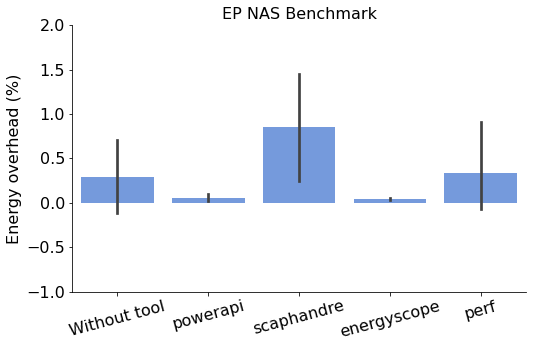

In [6]:
# Change benchmark names in plots
result_df.loc[result_df['benchmark'] == 'EP D NAS Benchmark','benchmark'] = 'EP NAS Benchmark'
result_df.loc[result_df['benchmark'] == 'LU C NAS Benchmark','benchmark'] = 'LU NAS Benchmark'
result_df.loc[result_df['benchmark'] == 'MG D NAS Benchmark','benchmark'] = 'MG NAS Benchmark'
result_df.loc[result_df['tool'] == 'no_tool','tool'] = 'Without tool'

plt.rcParams.update({'font.size': 16})

resulf_df_plot = result_df[result_df['benchmark'] == 'EP NAS Benchmark']

ax = sns.catplot(x="tool", y="overhead",
                 col="benchmark",
                 data=resulf_df_plot, 
                 kind="bar",
                 height=5,
                 aspect=1.5,
                 color="cornflowerblue")

ax.set_xticklabels(rotation=15)
ax.set_xlabels("")
ax.set_ylabels("Energy overhead (%)", fontsize="16")
ax.set(ylim=(-1, 2))
ax.set_titles(template='{col_name}')

ax.savefig('../figures/energy_overhead.pdf')
ax.savefig('../figures/energy_overhead.png')